In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
from tkinter import Tk
from tkinter.filedialog import askopenfilename

Tk().withdraw() 
file_path = askopenfilename(title="Select Heart Disease Dataset")


df = pd.read_csv(file_path)


print("File loaded from:", file_path)
print(df.shape)
print(df.columns)
df.head()


File loaded from: C:/Users/roop1/OneDrive/Documents/lab2_healthcare/data/HeartDiseaseTrain-Test.csv.csv
(1025, 14)
Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [3]:

print(df.isnull().sum())


age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64


In [4]:
print(df.columns)


Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholestoral', 'fasting_blood_sugar', 'rest_ecg', 'Max_heart_rate',
       'exercise_induced_angina', 'oldpeak', 'slope',
       'vessels_colored_by_flourosopy', 'thalassemia', 'target'],
      dtype='object')


In [5]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [6]:

X = df.drop('target', axis=1)
y = df['target']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [8]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Feature and target split (must be after encoding)
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split the data again
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [9]:
print(X_train.dtypes)


age                                           int64
resting_blood_pressure                        int64
cholestoral                                   int64
Max_heart_rate                                int64
oldpeak                                     float64
sex_Male                                       bool
chest_pain_type_Atypical angina                bool
chest_pain_type_Non-anginal pain               bool
chest_pain_type_Typical angina                 bool
fasting_blood_sugar_Lower than 120 mg/ml       bool
rest_ecg_Normal                                bool
rest_ecg_ST-T wave abnormality                 bool
exercise_induced_angina_Yes                    bool
slope_Flat                                     bool
slope_Upsloping                                bool
vessels_colored_by_flourosopy_One              bool
vessels_colored_by_flourosopy_Three            bool
vessels_colored_by_flourosopy_Two              bool
vessels_colored_by_flourosopy_Zero             bool
thalassemia_

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Define hyperparameters to search
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10]
}

# Grid Search
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1')
grid_rf.fit(X_train, y_train)

# Best parameters
print("Best Random Forest Parameters:", grid_rf.best_params_)


Best Random Forest Parameters: {'max_depth': 10, 'n_estimators': 100}


In [11]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize GBM model
gbm = GradientBoostingClassifier(random_state=42)

# Define hyperparameter grid
param_grid_gbm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Grid Search with 5-fold CV
grid_gbm = GridSearchCV(gbm, param_grid_gbm, cv=5, scoring='f1')
grid_gbm.fit(X_train, y_train)

# Print best params
print("Best GBM Parameters:", grid_gbm.best_params_)


Best GBM Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Step 1: Define SVM model
svm = SVC(probability=True, random_state=42)

# Step 2: Define parameter grid (simple for fast tuning)
param_grid_svm = {
    'C': [1],              # You can add [0.1, 1, 10] if you want more
    'kernel': ['linear']   # Use 'linear' only to speed up training
}

# Step 3: Set up GridSearchCV
grid_svm = GridSearchCV(
    estimator=svm,
    param_grid=param_grid_svm,
    cv=3,                  # 3-fold CV (faster than 5)
    scoring='f1'
)

# Step 4: Fit the model
grid_svm.fit(X_train, y_train)

# Step 5: Print best parameters
print("✅ Best SVM Parameters:", grid_svm.best_params_)


✅ Best SVM Parameters: {'C': 1, 'kernel': 'linear'}


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # for AUC
    
    print(f"\n🔍 {name} Evaluation:")
    print(classification_report(y_test, y_pred))
    print("AUC-ROC:", round(roc_auc_score(y_test, y_proba), 3))
    
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }


In [14]:
results = []

# Evaluate all three models
results.append(evaluate_model("SVM", grid_svm.best_estimator_, X_test, y_test))
results.append(evaluate_model("Random Forest", grid_rf.best_estimator_, X_test, y_test))
results.append(evaluate_model("GBM", grid_gbm.best_estimator_, X_test, y_test))



🔍 SVM Evaluation:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       100
           1       0.84      0.93      0.88       105

    accuracy                           0.87       205
   macro avg       0.88      0.87      0.87       205
weighted avg       0.88      0.87      0.87       205

AUC-ROC: 0.942

🔍 Random Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

AUC-ROC: 1.0

🔍 GBM Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00

In [15]:
import pandas as pd

results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)
results_df.round(3)


,Accuracy,Precision,Recall,F1-Score,AUC-ROC
Model,,,,,
SVM,0.873,0.838,0.933,0.883,0.942
Random Forest,1.000,1.000,1.000,1.000,1.000
GBM,1.000,1.000,1.000,1.000,1.000


<Axes: title={'center': 'Model Performance Comparison'}, xlabel='Model'>

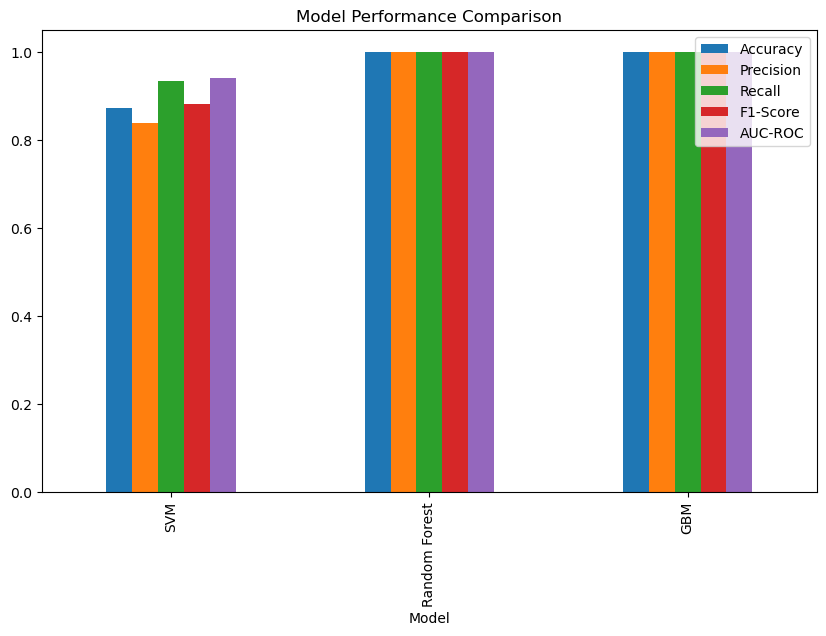

In [16]:
results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']].plot.bar(figsize=(10,6), title="Model Performance Comparison")
